In [1]:
# https://www.datacamp.com/tutorial/k-means-clustering-python

1. Imports

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

2. Read Data

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")

target_Y = df["Personal Loan"]
feature_X = df.drop(columns=["ID", "Personal Loan"], axis=1)

3. Split data

We use stratify in train_test_split to ensure the train and test sets have the same proportion of target classes as the original dataset. This helps maintain class balance, especially important for imbalanced classification problems.

In [4]:
X_train, X_test, y_train, y_test = train_test_split( feature_X, target_Y, test_size=0.3, stratify=target_Y, random_state=42)

4. Normalize data

In [5]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

5. Train the model

In [6]:
kmeans = KMeans(n_clusters = 6, random_state = 42, n_init='auto')
kmeans.fit(X_train_norm)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


6. Calculate silhouette score
<br />
Silhouette Score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters.
<br />
https://how.dev/answers/what-is-silhouette-score
<br />
https://farshadabdulazeez.medium.com/understanding-silhouette-score-in-clustering-8aedc06ce9c4

In [7]:
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.49831737135980164

7. Trying to find the best model (Where elbow tilts)
<br />init='k-means++': Smart initialization method to speed up convergence.
<br /> n_init='auto': Number of times the k-means algorithm is run with different centroid seeds.
<br /> max_iter: Maximum number of iterations for a single run.
<br /> random_state: for reproducibility

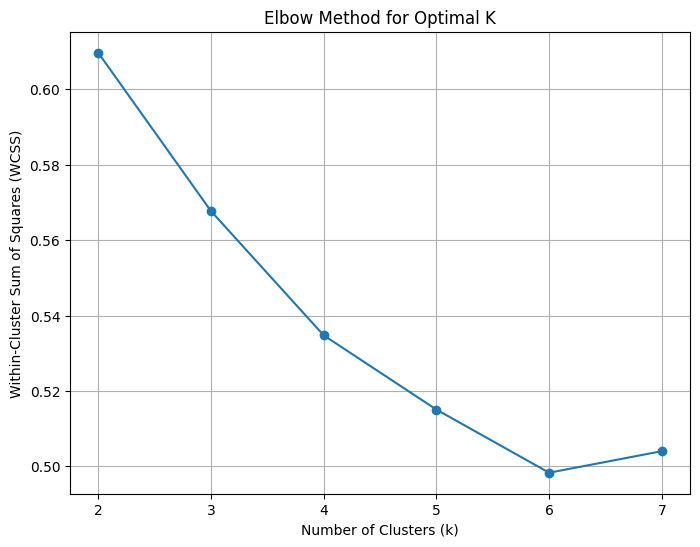

In [8]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 42, n_init='auto').fit(X_train_norm)    
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))
    
plt.figure(figsize=(8, 6))
plt.plot(K, score, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()